# Практическая работа №1: Алгоритмы эффективного вычисления одночленов

Выполнил студент гр. 1304 Байков Егор. Вариант №29.

## Цель работы

Сформировать знания о работе алгоритмах вычисления одночленов за минимальное число операций, привить навык использования систем компьютерной математики для реализации алгоритмов.

## Основные теоретические положения

В лабораторной работе рассматриваются методы вычисления одночленов за минимальное количество операций, а также приводятся некоторые оценки количества для вычисления одночленов.
Для понимания работы методов введем следующие обозначения:<br>
$\lambda(n) = \lfloor log_{2}(n) \rfloor$ - уменьшенная на 1 длина бинарной записи n<br>
$\nu(n)$ - вес Хэмминга для бинарной записи числа $n$ (число единиц в бинарной записи)

### Бинарный метод $SX$

Рассмотрим алгоритм возведения в степень $n$ бинарным методом $SX$:
<ol>
    <li>Представим $n$ в бинаром виде $n = (a_{m}, a_{m-1}, ..., a_{1})_{2}$, причем $a_{m} = 1$</li>
    <li>Отбросим старший бит</li>
    <li>Преобразуем двоичную запись $n$:<center>$a_{i} = 1 \to a_{i} = SX$<br>$a_{i} = 0 \to a_{i} = X$</center></li>
    <li>Выполняем вычисления: начинаем с $x$, идем по преобразованной записи числа $n$:<center>$a_{i} = S \to x = x ^ 2$<br>$a_{i} = X \to x = x * x$</center></li>
</ol>
Число операций для бинарного метода $SX$ можно выразить через формулу: $\lambda(n) + \nu(n) - 1$ 

### Бинарный метод возведения справа налево

Рассмотрим алгоритм для возведения в степень $n$ методом справа налево:
<ol>
    <li>На нулевой итерации поставим $N = n; Y = 1; Z = x$</li>
    <li>Если $N$ чётно - переходим на пункт 3, иначе - на пункт 4</li>
    <li>Переприсваиваем $N = \lfloor N/2 \rfloor; Z = Z * Z$; переходим на пункт 2</li>
    <li>Переприсваиваем $N = \lfloor N/2 \rfloor; Y = Z * Y$</li>
    <li>Если $N = 0$, то возвращаем $Y$ как ответ и выходим из алгоритма. Иначе - переприсваиваем $Z = Z * Z$ и переходим на пункт 2</li>
</ol>
Число операций для бинарного метода справа налево можно выразить через формулу: $\lambda(n) + \nu(n)$

### Метод множителей

Рассмотрим шаги возведения в степень $n$ методом множителей:
<ol>
    <li>Представим $n$ в виде разложения $n = p * q$, где $p$ - наименьший простой множитель $n$, а $q > 1$. Таким образом, $x^n$ можно найти, вычислив $x^p$ и возведя эту величину в степень $q$</li>
    <li>Если $n$ - простое, то вычислим $x^{n-1}$ и умножим его на x</li>
    <li>При $n = 1$ - получим $x^n$</li>
</ol>

### Дерево степеней

Рассмотрим алгоритм построения дерева степеней до $k$-го уровня:
<ol>
    <li>На нулевом уровне в дереве только один узел - $1$. Это корень дерева</li>
    <li>$k+1$-й уровень строим так: берём каждый узел $i$ на $k$-м уровне слева направо и присоединяем узлы $i+a_{0}, i+a_{1}, ..., i+a_{k-1}$</li>
    <li>При этом, если узел уже появлялся - он не добавляется</li>
</ol>


## Постановка задачи

Реализовать алгоритмы вычисления мономов за минимальное число операций с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

### 1. Бинарный метод SX
Реализуем функцию $SXMethod$, которая принимает на вход целочисленное значение степени, в которую необходимо возвести переменную. Внутри функции степень записывается в виде двоичной записи с помощью встроенной функции $bin$. Затем с помощью среза отсечем старший бит от двоичной записи числа. С помощью метода $replace$ заменим все вхождения удиницы в строке на $SX$, а все вхождения нулей на $S$. Переменная $result$ будет хранить в себе итоговое значение, получаемое в ходе работы функции. Для демонстрации выполнения работы функции выведем $SX$-строку и значение $result$ на каждой итерации алгоритма в виде (итерация: значение $result$).

In [8]:
def SXMethod(power: int):
    if power < 1:
        return 1
    sx_representation = bin(power)[3:].replace('1', 'SX').replace('0', 'S')
    result = var('x')
    print(sx_representation)
    for i, element in enumerate(sx_representation):
        if element == 'X':
            result *= x
        else:
            result ^= 2
        print(f'({i + 1}: {result})')
    return result

Рассмотрим работу программы для степеней $n$: 33, 15, 47

In [2]:
show(SXMethod(33))

SSSSSX
(1: x^2)
(2: x^4)
(3: x^8)
(4: x^16)
(5: x^32)
(6: x^33)


x^33

In [3]:
show(SXMethod(15))

SXSXSX
(1: x^2)
(2: x^3)
(3: x^6)
(4: x^7)
(5: x^14)
(6: x^15)


x^15

In [4]:
show(SXMethod(47))

SSXSXSXSX
(1: x^2)
(2: x^4)
(3: x^5)
(4: x^10)
(5: x^11)
(6: x^22)
(7: x^23)
(8: x^46)
(9: x^47)


x^47

Проверим корректность работы, написанной программы с помощью формулы $\lambda(n) + \nu(n) - 1$.
$n = 33 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 5; \nu(n) = 2; \lambda(n) + \nu(n) - 1 = 6 \Rightarrow$ Верно<br>
$n = 15 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 3; \nu(n) = 4; \lambda(n) + \nu(n) - 1 = 6 \Rightarrow$ Верно<br>
$n = 47 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 5; \nu(n) = 5; \lambda(n) + \nu(n) - 1 = 9 \Rightarrow$ Верно<br>

#### Вывод
Реализован бинарный метод $SX$, проверена его работоспособность, а также корректность вычислений с помощью формул приведенных выше. Метод прост в реализации и эффективности. Благодаря оценке можно легко узнать, за сколько итераций будет произведен расчёт.

### 2. Бинарный метод возведения в степень справа налево
Была реализована функция $BinRightToLeftMethod$, которая возводит переменную в степень $power$ с помощью бинарного метотда возведения справа налево. НА вход функция принимает степень $power$.

In [4]:
def BinRightToLeftMethod(power: int):
    iter_count = 0
    N = power
    Y = 1
    Z = var('x')
    print(f'| iteration = {iter_count} | N = {N} | Y = {Y} | Z = {Z} |')
    
    while N != 0:
        if N % 2:
            N = floor(N / 2)
            Y *= Z
            if N != 0:
                Z *= Z
        else:
            N = floor(N / 2)
            Z *= Z
        iter_count += 1
        print(f'| iteration = {iter_count} | N = {N} | Y = {Y} | Z = {Z} |')

Рассмотрим работу программы для степеней $n$: 33, 15, 47

In [5]:
BinRightToLeftMethod(33)

| iteration = 0 | N = 33 | Y = 1 | Z = x |
| iteration = 1 | N = 16 | Y = x | Z = x^2 |
| iteration = 2 | N = 8 | Y = x | Z = x^4 |
| iteration = 3 | N = 4 | Y = x | Z = x^8 |
| iteration = 4 | N = 2 | Y = x | Z = x^16 |
| iteration = 5 | N = 1 | Y = x | Z = x^32 |
| iteration = 6 | N = 0 | Y = x^33 | Z = x^32 |


| Номер итерации  | Значение N | Значиение Y | Значиение Z |
|:------------------:|:------------:|:-------------:|:-------------:|
| 0    | 33     | 1       | $x$     |
| 1    | 16     | $x$     | $x^2$   |
| 2    | 8      | $x$     | $x^4$   |
| 3    | 4      | $x$     | $x^8$   |
| 4    | 2      | $x$     | $x^{16}$|
| 5    | 1      | $x$     | $x^{32}$|
| 6    | 0      | $x^{33}$| $x^{32}$|

In [6]:
BinRightToLeftMethod(15)

| iteration = 0 | N = 15 | Y = 1 | Z = x |
| iteration = 1 | N = 7 | Y = x | Z = x^2 |
| iteration = 2 | N = 3 | Y = x^3 | Z = x^4 |
| iteration = 3 | N = 1 | Y = x^7 | Z = x^8 |
| iteration = 4 | N = 0 | Y = x^15 | Z = x^8 |


| Номер итерации  | Значение N | Значиение Y | Значиение Z |
|:------------------:|:------------:|:-------------:|:-------------:|
|   0 |  15 |  1 |  $x$ |
|   1 |  7 |  $x$ |  $x^2$ |
|   2 |  3 |  $x^3$ |  $x^4$ |
|   3 |  1 |  $x^7$ |  $x^8$ |
|   4 |  0 |  $x^{15}$ |  $x^8$ |

In [7]:
BinRightToLeftMethod(47)

| iteration = 0 | N = 47 | Y = 1 | Z = x |
| iteration = 1 | N = 23 | Y = x | Z = x^2 |
| iteration = 2 | N = 11 | Y = x^3 | Z = x^4 |
| iteration = 3 | N = 5 | Y = x^7 | Z = x^8 |
| iteration = 4 | N = 2 | Y = x^15 | Z = x^16 |
| iteration = 5 | N = 1 | Y = x^15 | Z = x^32 |
| iteration = 6 | N = 0 | Y = x^47 | Z = x^32 |


| Номер итерации  | Значение N | Значиение Y | Значиение Z |
|:------------------:|:------------:|:-------------:|:-------------:|
| 0 | 47 | 1 | $x$ |
| 1 | 23 | $x$ | $x^2$ |
| 2 | 11 | $x^3$ | $x^4$ |
| 3 | 5 | $x^7$ | $x^8$ |
| 4 | 2 | $x^{15}$ | $x^{16}$ |
| 5 | 1 | $x^{15}$ | $x^{32}$ |
| 6 | 0 | $x^{47}$ | $x^{32}$ |

Проверим корректность работы, написанной программы с помощью формулы $\lambda(n) + \nu(n)$.
$n = 33 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 5; \nu(n) = 2; \lambda(n) + \nu(n) = 7 \Rightarrow$ Верно<br>
$n = 15 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 3; \nu(n) = 4; \lambda(n) + \nu(n) = 7 \Rightarrow$ Верно<br>
$n = 47 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 5; \nu(n) = 5; \lambda(n) + \nu(n) = 10 \Rightarrow$ Верно<br>

#### Вывод
Реализован бинарный метод справа налево, проверена его работоспособность. Проверена корректнсть выводимых значений с помощью формулы $\lambda(n) + \nu(n)$. Из реализации можно сделать вывод, что бинарный метод возведения справа налево является более простым для понимания, но количество опреаций для возведения числа в степень $n$ требуется больше на 1.

### 3. Сравнение метода $SX$ и бинарного метода возведения справа налево.

Можно заметить что для возведения в степень методом справа налево требуется на одну операцию больше, чем с помощью метода $SX$. Из этого следует что метод $SX$ выгоднее метода возведения справа налевою

### 4. Метод множителей.

Выполним метод множителей для ранее взятых $n = 33, n = 15, n = 47$ по алгоритму, приведенному в теоретическом приложении.

#### Метод множителей для n = 33

$x^{33} = (x^3)^{11}$<br>
$(x^3)^{11} = x^3 * (x^3)^{10}$<br>
$(x^3)^{10} = ((x^3)^2)^5$<br>

Рассчитаем количество операций:<br>
$x^3 \rightarrow x, x^2, x^3 \quad$ (2 операции)<br>
$(x^3)^2 \rightarrow x^3, (x^3)^2 \quad$ (1 операция)<br>
$((x^3)^2)^5 \rightarrow ((x^3)^2), ((x^3)^2)^2, ((x^3)^2)^4, ((x^3)^2)^5\quad$ (3 операции)<br>
$x^{33} = (x^3)^{11} = x^3 * (x^3)^{10}\quad$ (1 операция)<br>

Итого: 7 операций.
Можно заметить что для данного числа метод множителей работает хуже, чем метод $SX$, так как производит больше оперций (метод $SX$ для $n = 33$ дает 6 операций).

#### Метод множителей для n = 15

$x^{15} = (x^3)^{5}$<br>
$(x^3)^{5} = x^3 * (x^3)^{4}$<br>
$(x^3)^{4} = ((x^3)^2)^2$<br>

Рассчитаем количество операций:<br>
$x^3 \rightarrow x, x^2, x^3 \quad$ (2 операции)<br>
$(x^3)^2 \rightarrow x^3, (x^3)^2 \quad$ (1 операция)<br>
$((x^3)^2)^2 \rightarrow ((x^3)^2), ((x^3)^2)^2\quad$ (1 операция)<br>
$x^{15} = (x^3)^{5} = x^3 * (x^3)^{4}\quad$ (1 операция)<br>

Итого: 5 операций.
Можно заметить что для данного числа метод множителей работает лучше, чем метод $SX$, так как производит меньше оперций (метод $SX$ для $n = 15$ дает 6 операций).

#### Метод множителей для n = 47

$x^{47} = x * x^{46}$<br>
$x^{46} = (x^2)^{23}$<br>
$(x^2)^{23} = x^2 * (x^2)^{22}$<br>
$(x^2)^{22} = ((x^2)^2)^{11}$<br>
$((x^2)^2)^{11} = (x^2)^2 * ((x^2)^2)^{10}$<br>
$((x^2)^2)^{10} = (((x^2)^2)^2)^5$<br>
$(((x^2)^2)^2)^5 = ((x^2)^2)^2 * (((x^2)^2)^2)^4$<br>
$(((x^2)^2)^2)^4 = ((((x^2)^2)^2)^2)^2$<br>

Рассчитаем количество операций:<br>
$x^2 \rightarrow x, x^2 \quad$ (1 операция)<br>
$(x^2)^2 \rightarrow x^2, (x^2)^2 \quad$ (1 операция)<br>
$((x^2)^2)^2 \rightarrow ((x^2)^2), ((x^2)^2)^2\quad$ (1 операция)<br>
$(((x^2)^2)^2)^2 \rightarrow (((x^2)^2)^2), (((x^2)^2)^2)^2\quad$ (1 операция)<br>
$((((x^2)^2)^2)^2)^2 \rightarrow (((x^2)^2)^2), ((((x^2)^2)^2)^2)^2\quad$ (1 операция)<br>
$(((x^2)^2)^2)^5 = ((x^2)^2)^2 * (((x^2)^2)^2)^4 \quad$ (1 операция)<br>
$((x^2)^2)^{11} = (x^2)^2 * ((x^2)^2)^{10}\quad$ (1 операция)<br>
$(x^2)^{23} = x^2 * (x^2)^{22}\quad$ (1 операция)<br>
$x^{47} = x * x^{46}\quad$ (1 операция)<br>

Итого: 9 операций.

#### Вывод
Таким образом, рассмотрен метод множителей для нескольких $n$. Его преимущество заключается в наглядности и простоте идеи, возможности легко посчитать число операций для возведения числа в степень без написания специальных программ. Помимо этого, метод множителей может быть быстрее, чем бинарный (как было доказано для $n = 15$). Его минус - сложность реализации, скорее всего из-за применения рекурсии. Иногда метод проигрывает по числу операций, как это было доказано для $n = 33$.

### 5. Построение дерева степеней.

Для реализации алгоритма построения дерева степеней был создан класс $DegreeTree$, в котором описаны все методы и поля, необходимые для реализации. Конструктор класса будет принимать в себя количество уровней дерева, а также хранить структуру самого дерева с помощью словаря вида {узел: список родителей}.

In [21]:
class DegreeTree:
    def __init__(self, levels_amount: int) -> None:
        self.tree = {1: []}
        self.levels_amount = levels_amount
        self.build_tree()
    
    def build_tree(self):
        current_level_nodes = [1]
        for current_level in range(self.levels_amount):
            next_level_nodes = []
            for parent in current_level_nodes:
                for node in self.get_path_to_node(parent):
                    potential_child = parent + node
                    if potential_child not in self.tree:
                        self.tree[potential_child] = [parent]
                        next_level_nodes.append(potential_child)
            current_level_nodes = next_level_nodes
    
    def get_path_to_node(self, node):
        path = [node]
        while node != 1:
            node = self.tree[node][0]
            path.append(node)
        return path[::-1]
    
    def get_branch_path_to_node(self, node):
        common_path = self.get_path_to_node(node)
        branches = [(common_path[i], common_path[i+1]) for i in range(len(common_path)-1)]
        return branches
    
    def print_tree(self, node=None):
        output_graph = Graph(self.tree)
        if node not in self.tree:
            node = 1
        picture = output_graph.plot(layout = 'tree', tree_root = 1, vertex_color = 'yellow', by_component = True,\
                             edge_colors={(0, 1, 0): self.get_branch_path_to_node(node)}, figsize=(20, 30))
        picture.show()
    
    def show_answer(self, node=None):
        if node not in self.tree:
            show("This node is not in the graph")
        
        x = var('x')
        answer = []
        for degree in self.get_path_to_node(node):
            answer.append(x^degree)
        print("chain: ", answer)
        print("count operations: " + str(len(answer) - 1))
        
    def get_operations_amount(self, node):
        return len(self.get_path_to_node(node)) - 1
    
    def compare_SX_and_DegreeTree(self):
        return "Дерево степеней требует меньше операций" if all([self.get_operations_amount(degree) \
                    < (floor(log(degree, 2)) + bin(degree)[2:].count('1') - 1)] for degree in (2, 1000))\
                    else "Метод SX требует меньше операций"

chain:  [x, x^2, x^3, x^5, x^10, x^15]
count operations: 5


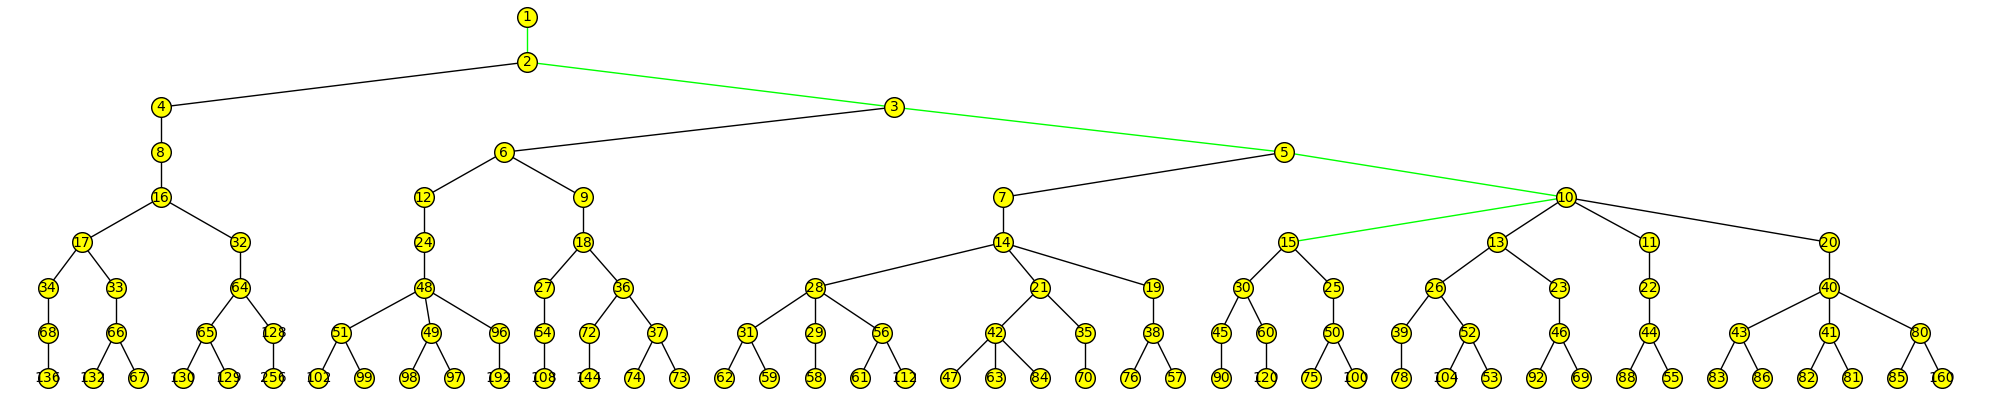

In [12]:
degree_tree = DegreeTree(8)
degree_tree.show_answer(15)
degree_tree.print_tree(15)

chain:  [x, x^2, x^4, x^8, x^16, x^17, x^33]
count operations: 6


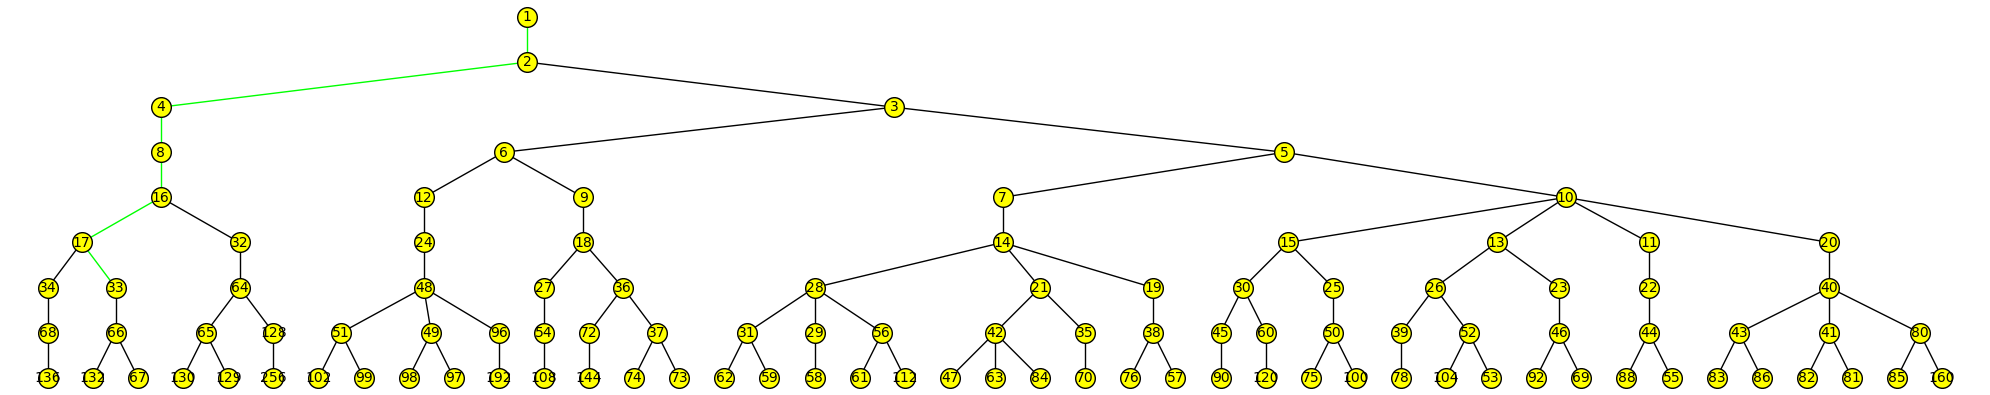

In [13]:
degree_tree.show_answer(33)
degree_tree.print_tree(33)

chain:  [x, x^2, x^3, x^5, x^7, x^14, x^21, x^42, x^47]
count operations: 8


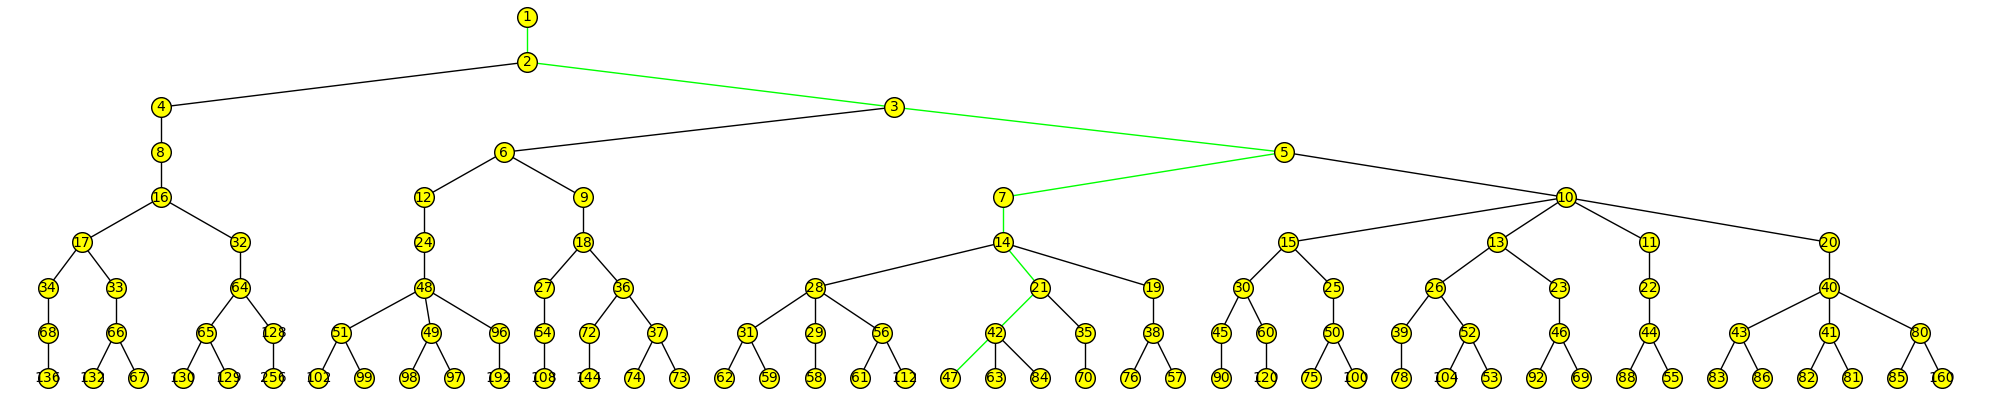

In [14]:
degree_tree.show_answer(47)
degree_tree.print_tree(47)

Из предыдущих вычислений, можно заметить что алгоритм работает корректно. Для каждого числа, взятого ранее были построены цепочки по дереву степеней а также показан путь до степени $n$ (путь выделен зеленым цветом).

Сравним дерево степеней с бинареым методом $SX$. Для этого воспользуемся методом класса $compare\_SX\_and\_DegreeTree$. Будем говорить, что дерево степеней требует меньше операций, чем бинарный метод $SX$ для $n$ меньше $1000$.

In [23]:
degree_tree = DegreeTree(20)
print(degree_tree.compare_SX_and_DegreeTree())

Дерево степеней требует меньше операций


Из вывода программы выше видно что дерево степеней требует меньше операций, чем метод $SX$. Более того, можно утверждать, что дерево степеней требует меньше операций чем бинарный метод справа налево, поскольку изветно, что этот метод требует больше операций, чем метод $SX$.

#### Вывод
Таким образом, реализован алгоритм "дерева степеней". Получилось отобразить дерево средствами *SageMath* до заданного уровня *k*, выделить цветом путь от вершины дерева до заданного числа *n*. В результате сравнения данного метода с бинарным $SX$ - получили, что дерево степеней ему не проигрывает (а следовательно выигрывает метод справа налево). Более того, дерево степеней в не хуже метода множителей, потому что требует либо то же количество операций (для $n = 33$ или $n = 15$), либо меньше (для $n = 47$)

### 6. Изменённое дерево степеней

Был изменен алгоритм построения бинарного дерева, чтобы появилась возможность построить дерево убывающих степеней.
Был создан класс, наследующийся от класса $DegreeTree$, у которого переопределен метод $get\_path\_to\_node$

In [27]:
class InverseDegreeTree(DegreeTree):
    def get_path_to_node(self, node=None):
        path = [node]
        while node != 1:
            node = self.tree[node][0]
            path.append(node)
        return path
    
    def compare_SX_and_DegreeTree(self):
        return "Дерево обратных степеней требует столько же операций, что и метод SX" if all([self.get_operations_amount(degree) \
                    == (floor(log(degree, 2)) + bin(degree)[2:].count('1') - 1)] for degree in (2, 1000))\
                    else "Утверждение неверно"

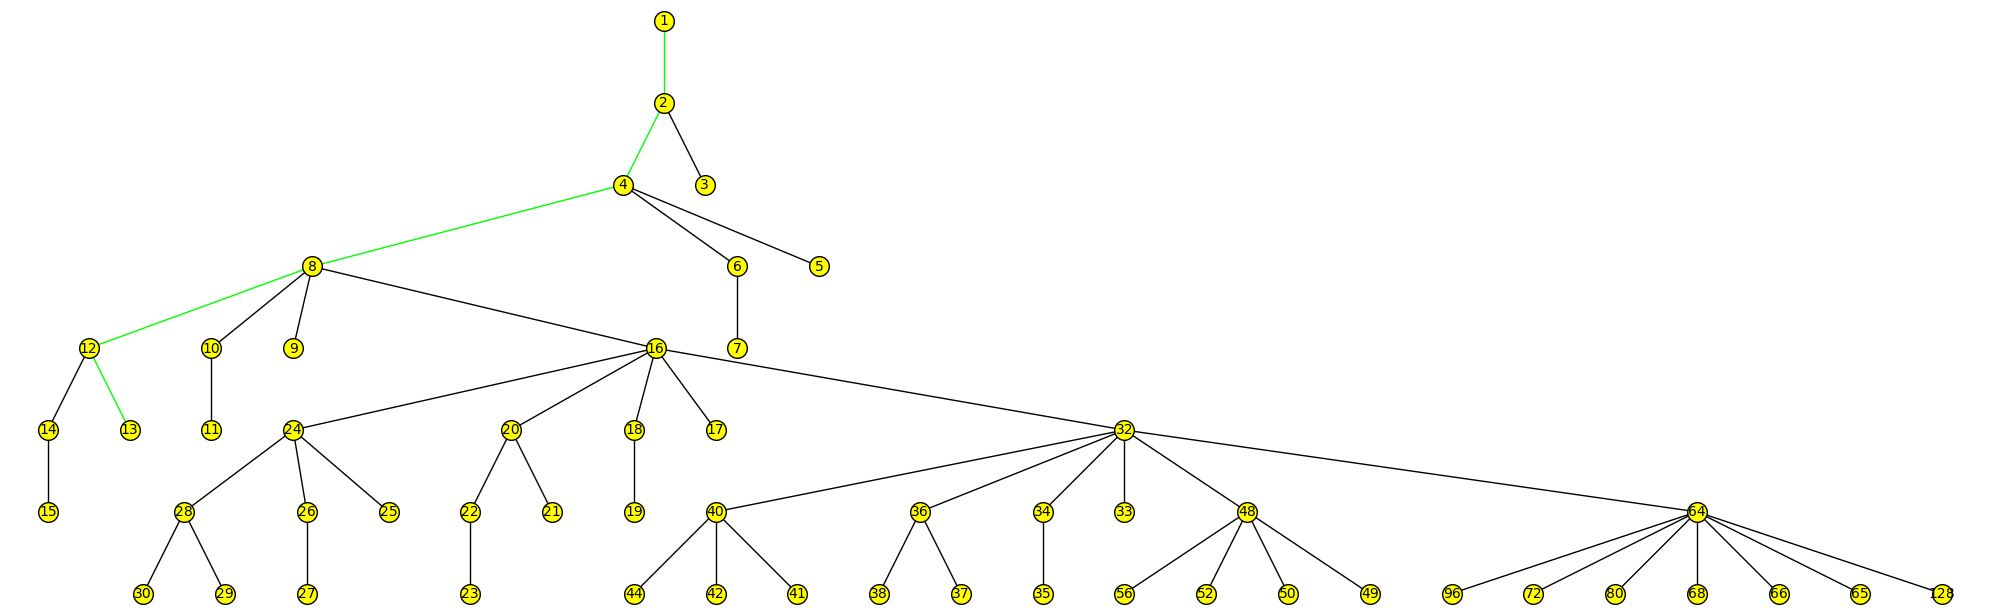

In [28]:
inverse_degree_tree = InverseDegreeTree(7)
inverse_degree_tree.print_tree(13)

Проверим что данная реализация дерева степеней затрачивает то же количество операций что и бинарный метод $SX$ (для $n$ меньше $1000$).

In [29]:
inverse_degree_tree = InverseDegreeTree(20)
print(inverse_degree_tree.compare_SX_and_DegreeTree())

Дерево обратных степеней требует столько же операций, что и метод SX


## Выводы

Сформированы знания о работе алгоритмов вычисления одночленов за минимальное число операций, приобретены навыки применения *SageMath* для реализации алгоритмов.<br>
Реализован бинарный метод $SX$, бинарный метод возведения в степень справа налево, рассмотрен метод множителей и реализован алгоритм "дерева степеней". Алгоритмы проверены на работоспособность, произведено сравнение с теоретическими положениями.<br>
Реализовано дерево убывающих степеней, произведено сравнение с бинарным методом $SX$.<br>